<a href="https://colab.research.google.com/github/Nhu198/Credit-Card-Approval-Predicton-with-Machine-Learning-Models/blob/main/Credit_Card_Approval_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
app_data = pd.read_csv('/content/application_record.csv')

In [ ]:
credit_data = pd.read_csv('/content/credit_record.csv')

In [ ]:
app_data = pd.DataFrame(app_data)
credit_data = pd.DataFrame(credit_data)

In [ ]:
app_df = app_data.copy()
credit_df = credit_data.copy()

In [ ]:
app_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0                2  
1                2  
2                2  
3                1  
4                1

In [ ]:
credit_df.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

# EDA

## Data Cleaning

**1. app_df**

**Null Value Handling**

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
app_df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
app_df['OCCUPATION_TYPE'].isnull().sum()

134203

In [ ]:
app_df['OCCUPATION_TYPE'].replace(np.nan,'Others',inplace=True)

**Feature Engineering (calculate Age + working year)**

In [ ]:
from datetime import datetime, date, timedelta
newday = date.today() + timedelta(days = -12)
newday

datetime.date(2023, 5, 18)

In [ ]:
today1 = datetime.now()
today1

datetime.datetime(2023, 5, 30, 12, 40, 58, 51512)

In [ ]:
today2 = datetime.today().strftime('%d/%m/%Y')
today2

'30/05/2023'

In [ ]:
app_df['CURDATE'] = today2

In [ ]:
app_df['CURDATE'] = pd.to_datetime(app_df['CURDATE'])

<ipython-input-17-c946428896d2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  app_df['CURDATE'] = pd.to_datetime(app_df['CURDATE'])


In [ ]:
app_df['BIRTHDATE'] = app_df['CURDATE'] +  pd.to_timedelta(app_df['DAYS_BIRTH'], unit='d')

In [ ]:
app_df.head(3)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0          Working               Higher education   
1          427500.0          Working               Higher education   
2          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0     Civil marriage   Rented apartment      -12005          -4542   
1     Civil marriage   Rented apartment      -12005          -4542   
2            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0          Others   
1           1                1           0           0          Others   
2           1                0           0           0  Security staff   

   CNT_FAM_MEMBERS    CURDATE  BIRTHDATE  
0                2 2023-05-30 1990-07-17  
1                2 2023-05-30 1990-07-17  
2                2 2023-05-30 1964-08-13

In [ ]:
def calculate_age(birthday):
    today = date.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

app_df['AGE'] = app_df['BIRTHDATE'].apply(calculate_age)
app_df.head(5)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  \
0        Civil marriage   Rented apartment  ...          -4542           1   
1        Civil marriage   Rented apartment  ...          -4542           1   
2               Married  House / apartment  ...          -1134           1   
3  Single / not married  House / apartment  ...          -3051           1   
4  Single / not married  House / apartment  ...          -3051           1   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                1           0           0           Others               2   
1                1           0           0           Others               2   
2                0           0           0   Security staff               2   
3                0           1           1      Sales staff               1   
4                0           1           1      Sales staff               1   

     CURDATE  BIRTHDATE AGE  
0 2023-05-30 1990-07-17  32  
1 2023-05-30 1990-07-17  32  
2 2023-05-30 1964-08-13  58  
3 2023-05-30 1971-02-02  52  
4 2023-05-30 1971-02-02  52  

[5 rows x 21 columns]

In [ ]:
app_df['AGE'].min()

20

In [ ]:
app_df['AGE'].max()

68

In [ ]:
app_df['WORKING_YEARS'] = abs(app_df['DAYS_EMPLOYED'])/365

In [ ]:
pd.set_option('display.float_format','{:.2f}'.format)

In [ ]:
app_df['FLAG_OWN_CAR'].replace(['Y','N'],[1,0],inplace=True)
app_df['FLAG_OWN_REALTY'].replace(['Y','N'],[1,0],inplace=True)

In [ ]:
app_df = app_df.drop(['DAYS_BIRTH'], axis = 1)
app_df = app_df.drop(['DAYS_EMPLOYED'], axis = 1)

In [ ]:
app_df.head(3)

ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M             1                1             0   
1  5008805           M             1                1             0   
2  5008806           M             1                1             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         427500.00          Working               Higher education   
1         427500.00          Working               Higher education   
2         112500.00          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0     Civil marriage   Rented apartment           1                1   
1     Civil marriage   Rented apartment           1                1   
2            Married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS    CURDATE  \
0           0           0          Others                2 2023-05-30   
1           0           0          Others                2 2023-05-30   
2           0           0  Security staff                2 2023-05-30   

   BIRTHDATE  AGE  WORKING_YEARS  
0 1990-07-17   32          12.44  
1 1990-07-17   32          12.44  
2 1964-08-13   58           3.11

**Duplicate values handling**

In [ ]:
app_duplicate = app_df[app_df.duplicated('ID',keep='last')]  # keep='last' vì cho rằng thông tin sau sẽ đúng hơn tt trước vd, lương có thể thay đổi
app_duplicate                                                # nên ta cần lấy thông tin mới nhất

ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
421211  7702516           F             0                1             2   
421268  7602432           M             0                1             0   
421464  7836971           M             1                0             1   
421698  7213374           M             1                0             0   
421726  7052783           M             1                1             0   
421907  7023651           M             1                0             1   
422068  7838075           M             0                1             0   
422077  7636389           M             0                0             0   
422119  7052812           F             0                1             0   
422326  7372589           F             0                1             0   
422747  7155150           F             1                0             0   
423076  7090931           F             1                0             0   
423143  7091721           M             1                1             0   
423160  7137299           M             1                0             1   
423327  7744386           F             1                1             0   
423416  7772847           F             1                1             0   
423592  7636756           F             1                1             1   
423794  7317997           M             1                1             2   
423852  7053557           M             0                1             1   
423874  7742853           F             0                1             1   
424151  7576316           M             1                1             0   
424224  7099881           F             0                1             0   
424618  7046068           F             0                1             0   
424708  7036518           F             0                1             0   
424819  7742298           F             0                1             0   
425023  7022197           F             0                1             0   
425235  7603224           M             1                1             0   
425486  7023108           M             1                1             1   
425539  7089090           F             0                0             1   
425624  7702238           F             0                1             0   
426018  7243768           M             0                0             0   
426022  7045885           M             0                1             0   
426563  7836711           F             0                1             2   
426845  7743418           F             0                1             0   
427007  7045794           F             0                0             0   
427016  7618285           M             0                0             0   
427114  7207977           F             0                1             0   
427164  7154598           M             1                0             0   
427287  7154819           F             0                0             0   
427778  7024111           M             0                0             2   
428166  7282535           F             0                0             1   
428171  7050948           F             0                0             0   
428632  7416167           F             0                1             0   
428911  7174719           F             0                1             0   
429228  7833087           F             0                1             0   
431201  7135270           F             0                1             2   
431545  7022327           F             0                1             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
421211         180000.00               Working  Secondary / secondary special   
421268         315000.00  Commercial associate               Higher education   
421464         157500.00               Working  Secondary / secondary special   
421698         148500.00               W

In [ ]:
app_df = app_df.drop(app_duplicate.index,axis = 0)

In [ ]:
app_df.shape

(438510, 20)

**2. credit_df**

**Feature Engineering**

In [ ]:
credit_df.head(3)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

In [ ]:
credit_df['STATUS'].replace(['X','0','C','1'],['good','good','good','good'],inplace=True)
credit_df['STATUS'].replace(['2','3','4','5'],['bad','bad','bad','bad'],inplace=True)

In [ ]:
credit_df['STATUS'].value_counts()

good    1045471
bad        3104
Name: STATUS, dtype: int64

In [ ]:
cre_df = credit_df.copy()

In [ ]:
cre_df.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0   good
1  5001711              -1   good
2  5001711              -2   good
3  5001711              -3   good
4  5001712               0   good

In [ ]:
cre_df_good = cre_df[cre_df['STATUS'] == 'good']
cre_df_good.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0   good
1  5001711              -1   good
2  5001711              -2   good
3  5001711              -3   good
4  5001712               0   good

In [ ]:
cre_df_good = cre_df_good.groupby('ID').agg(GOOD = ('STATUS','count')).reset_index()


In [ ]:
cre_df_good.head()

ID  GOOD
0  5001711     4
1  5001712    19
2  5001713    22
3  5001714    15
4  5001715    60

In [ ]:
cre_df_bad = cre_df[cre_df['STATUS'] == 'bad']
cre_df_bad.head()

ID  MONTHS_BALANCE STATUS
8911  5002126             -46    bad
8912  5002126             -47    bad
8913  5002126             -48    bad
8914  5002126             -49    bad
8915  5002126             -50    bad

In [ ]:
cre_df_bad = cre_df_bad.groupby('ID').agg(BAD = ('STATUS','count')).reset_index()
cre_df_bad.head()

ID  BAD
0  5002126    5
1  5002255    1
2  5002283    1
3  5002303    2
4  5002380    1

In [ ]:
merged_df= cre_df_good.merge(cre_df_bad, on='ID', how='outer')
merged_df

ID  GOOD  BAD
0      5001711     4  NaN
1      5001712    19  NaN
2      5001713    22  NaN
3      5001714    15  NaN
4      5001715    60  NaN
...        ...   ...  ...
45980  5150482    18  NaN
45981  5150483    18  NaN
45982  5150484    13  NaN
45983  5150485     2  NaN
45984  5150487    30  NaN

[45985 rows x 3 columns]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 0 to 45984
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      45985 non-null  int64  
 1   GOOD    45985 non-null  int64  
 2   BAD     667 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
merged_df['GOOD'].unique()

array([ 4, 19, 22, 15, 60, 39, 43, 36, 31,  8,  1,  7, 61, 11,  3, 24, 44,
       58, 47, 41, 29, 12, 28, 34, 21, 20, 30, 32, 26, 17, 23, 27, 33, 46,
        6, 14, 59, 25, 38, 10, 35, 48, 57,  9, 37, 54, 16, 18,  2,  5, 52,
       55, 51, 42, 56, 53, 40, 50, 13, 49, 45])

In [ ]:
merged_df['GOOD'].replace(np.nan,0,inplace=True)

In [ ]:
merged_df['BAD'].replace(np.nan,0,inplace=True)

In [ ]:
merged_df.head()

ID  GOOD  BAD
0  5001711     4 0.00
1  5001712    19 0.00
2  5001713    22 0.00
3  5001714    15 0.00
4  5001715    60 0.00

**Merge 2 bảng app_df và merged_df**



In [ ]:
final_df= pd.merge(app_df, merged_df, on='ID', how='inner')
final_df.head() 

ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M             1                1             0   
1  5008805           M             1                1             0   
2  5008806           M             1                1             0   
3  5008808           F             0                1             0   
4  5008809           F             0                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         427500.00               Working               Higher education   
1         427500.00               Working               Higher education   
2         112500.00               Working  Secondary / secondary special   
3         270000.00  Commercial associate  Secondary / secondary special   
4         270000.00  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  FLAG_PHONE  FLAG_EMAIL  \
0        Civil marriage   Rented apartment  ...           0           0   
1        Civil marriage   Rented apartment  ...           0           0   
2               Married  House / apartment  ...           0           0   
3  Single / not married  House / apartment  ...           1           1   
4  Single / not married  House / apartment  ...           1           1   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS    CURDATE  BIRTHDATE AGE WORKING_YEARS  \
0           Others                2 2023-05-30 1990-07-17  32         12.44   
1           Others                2 2023-05-30 1990-07-17  32         12.44   
2   Security staff                2 2023-05-30 1964-08-13  58          3.11   
3      Sales staff                1 2023-05-30 1971-02-02  52          8.36   
4      Sales staff                1 2023-05-30 1971-02-02  52          8.36   

   GOOD  BAD  
0    16 0.00  
1    15 0.00  
2    30 0.00  
3     5 0.00  
4     5 0.00  

[5 rows x 22 columns]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   36457 non-null  int64         
 1   CODE_GENDER          36457 non-null  object        
 2   FLAG_OWN_CAR         36457 non-null  int64         
 3   FLAG_OWN_REALTY      36457 non-null  int64         
 4   CNT_CHILDREN         36457 non-null  int64         
 5   AMT_INCOME_TOTAL     36457 non-null  float64       
 6   NAME_INCOME_TYPE     36457 non-null  object        
 7   NAME_EDUCATION_TYPE  36457 non-null  object        
 8   NAME_FAMILY_STATUS   36457 non-null  object        
 9   NAME_HOUSING_TYPE    36457 non-null  object        
 10  FLAG_MOBIL           36457 non-null  int64         
 11  FLAG_WORK_PHONE      36457 non-null  int64         
 12  FLAG_PHONE           36457 non-null  int64         
 13  FLAG_EMAIL           36457 non-

In [ ]:
df = final_df.copy()

In [ ]:
df["GOOD"] = df["GOOD"].astype("int")
df["BAD"] = df["BAD"].astype("int")

In [ ]:
df = df.drop(['FLAG_PHONE','FLAG_EMAIL','CURDATE','BIRTHDATE'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_MOBIL           36457 non-null  int64  
 11  FLAG_WORK_PHONE      36457 non-null  int64  
 12  OCCUPATION_TYPE      36457 non-null  object 
 13  CNT_FAM_MEMBERS      36457 non-null  int64  
 14  AGE                  36457 non-null  int64  
 15  WORKING_YEARS        36457 non-null 

**Label creating**

In [ ]:
df['STATUS'] = np.where(df['GOOD'] > df['BAD'], 1, 0)  # 1 tượng trưng cho eligible, 0 tượng trưng cho ineligible
df.head(10)

ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M             1                1             0   
1  5008805           M             1                1             0   
2  5008806           M             1                1             0   
3  5008808           F             0                1             0   
4  5008809           F             0                1             0   
5  5008810           F             0                1             0   
6  5008811           F             0                1             0   
7  5008812           F             0                1             0   
8  5008813           F             0                1             0   
9  5008814           F             0                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         427500.00               Working               Higher education   
1         427500.00               Working               Higher education   
2         112500.00               Working  Secondary / secondary special   
3         270000.00  Commercial associate  Secondary / secondary special   
4         270000.00  Commercial associate  Secondary / secondary special   
5         270000.00  Commercial associate  Secondary / secondary special   
6         270000.00  Commercial associate  Secondary / secondary special   
7         283500.00             Pensioner               Higher education   
8         283500.00             Pensioner               Higher education   
9         283500.00             Pensioner               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   
5  Single / not married  House / apartment           1                0   
6  Single / not married  House / apartment           1                0   
7             Separated  House / apartment           1                0   
8             Separated  House / apartment           1                0   
9             Separated  House / apartment           1                0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  AGE  WORKING_YEARS  GOOD  BAD  STATUS  
0          Others                2   32          12.44    16    0       1  
1          Others                2   32          12.44    15    0       1  
2  Security staff                2   58           3.11    30    0       1  
3     Sales staff                1   52           8.36     5    0       1  
4     Sales staff                1   52           8.36     5    0       1  
5     Sales staff                1   52           8.36    27    0       1  
6     Sales staff                1   52           8.36    39    0       1  
7          Others                1   61        1000.67    17    0       1  
8          Others                1   61        1000.67    17    0       1  
9          Others                1   61        1000.67    17    0       1

## Descriptive Statistic

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-59-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE',
       'WORKING_YEARS', 'GOOD', 'BAD', 'STATUS'],
      dtype='object')

In [ ]:
# Feature CNT_CHILDREN have outliners are 19,14,7. We need to remove these.

In [ ]:
df = df[(df['CNT_CHILDREN'] != 7) & (df['CNT_CHILDREN'] != 14) & (df['CNT_CHILDREN'] != 19)]

In [ ]:
df['CNT_CHILDREN'].value_counts()

0    25201
1     7492
2     3256
3      419
4       63
5       20
Name: CNT_CHILDREN, dtype: int64

In [ ]:
# 100% of applicants have mobile number, it is unhelpful in model, so we need so delete this feature.
df = df.drop(['FLAG_MOBIL'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36451 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36451 non-null  int64  
 1   CODE_GENDER          36451 non-null  object 
 2   FLAG_OWN_CAR         36451 non-null  int64  
 3   FLAG_OWN_REALTY      36451 non-null  int64  
 4   CNT_CHILDREN         36451 non-null  int64  
 5   AMT_INCOME_TOTAL     36451 non-null  float64
 6   NAME_INCOME_TYPE     36451 non-null  object 
 7   NAME_EDUCATION_TYPE  36451 non-null  object 
 8   NAME_FAMILY_STATUS   36451 non-null  object 
 9   NAME_HOUSING_TYPE    36451 non-null  object 
 10  FLAG_WORK_PHONE      36451 non-null  int64  
 11  OCCUPATION_TYPE      36451 non-null  object 
 12  CNT_FAM_MEMBERS      36451 non-null  int64  
 13  AGE                  36451 non-null  int64  
 14  WORKING_YEARS        36451 non-null  float64
 15  GOOD                 36451 non-null 

In [ ]:
# Delete outliner in feature CNT_FAM_MEMBERS has values: 20,15,9 but they have just deleted from the above step.
df['CNT_FAM_MEMBERS'].value_counts()

2    19463
1     6987
3     6421
4     3106
5      397
6       58
7       19
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
df['WORKING_YEARS'].value_counts()

1000.67    6135
1.10         78
4.22         64
0.55         63
5.72         61
           ... 
21.06         1
25.32         1
22.48         1
4.49          1
30.88         1
Name: WORKING_YEARS, Length: 3639, dtype: int64

In [ ]:
# Replace wrong value by median
median_work_year = df['WORKING_YEARS'].median()
median_work_year

6.898630136986301

In [ ]:
df['WORKING_YEARS'] = df['WORKING_YEARS'].replace('1000.6657534246575',median_work_year)


In [ ]:
df['WORKING_YEARS'].value_counts()

1000.67    6135
1.10         78
4.22         64
0.55         63
5.72         61
           ... 
21.06         1
25.32         1
22.48         1
4.49          1
30.88         1
Name: WORKING_YEARS, Length: 3639, dtype: int64

In [ ]:
df['WORKING_YEARS'] = df['WORKING_YEARS'].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36451 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36451 non-null  int64  
 1   CODE_GENDER          36451 non-null  object 
 2   FLAG_OWN_CAR         36451 non-null  int64  
 3   FLAG_OWN_REALTY      36451 non-null  int64  
 4   CNT_CHILDREN         36451 non-null  int64  
 5   AMT_INCOME_TOTAL     36451 non-null  float64
 6   NAME_INCOME_TYPE     36451 non-null  object 
 7   NAME_EDUCATION_TYPE  36451 non-null  object 
 8   NAME_FAMILY_STATUS   36451 non-null  object 
 9   NAME_HOUSING_TYPE    36451 non-null  object 
 10  FLAG_WORK_PHONE      36451 non-null  int64  
 11  OCCUPATION_TYPE      36451 non-null  object 
 12  CNT_FAM_MEMBERS      36451 non-null  int64  
 13  AGE                  36451 non-null  int64  
 14  WORKING_YEARS        36451 non-null  float64
 15  GOOD                 36451 non-null 

In [ ]:
# Download df to upload to powerBI for visualization
#file_name = 'credit_card_cleaned_data.xlsx'
#df.to_excel(file_name)

# Model Developing

In [ ]:
df.corr()

<ipython-input-85-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


ID  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
ID                1.00         -0.01            -0.10          0.03   
FLAG_OWN_CAR     -0.01          1.00            -0.02          0.11   
FLAG_OWN_REALTY  -0.10         -0.02             1.00         -0.00   
CNT_CHILDREN      0.03          0.11            -0.00          1.00   
AMT_INCOME_TOTAL -0.02          0.22             0.03          0.03   
FLAG_WORK_PHONE   0.08          0.02            -0.21          0.05   
CNT_FAM_MEMBERS   0.03          0.15            -0.01          0.89   
AGE              -0.06         -0.16             0.13         -0.35   
WORKING_YEARS    -0.04         -0.16             0.09         -0.24   
GOOD              0.02          0.03            -0.04         -0.01   
BAD               0.01          0.00            -0.00         -0.00   
STATUS           -0.00         -0.00             0.00          0.01   

                  AMT_INCOME_TOTAL  FLAG_WORK_PHONE  CNT_FAM_MEMBERS   AGE  \
ID                           -0.02             0.08             0.03 -0.06   
FLAG_OWN_CAR                  0.22             0.02             0.15 -0.16   
FLAG_OWN_REALTY               0.03            -0.21            -0.01  0.13   
CNT_CHILDREN                  0.03             0.05             0.89 -0.35   
AMT_INCOME_TOTAL              1.00            -0.04             0.02 -0.07   
FLAG_WORK_PHONE              -0.04             1.00             0.06 -0.18   
CNT_FAM_MEMBERS               0.02             0.06             1.00 -0.31   
AGE                          -0.07            -0.18            -0.31  1.00   
WORKING_YEARS                -0.17            -0.24            -0.22  0.62   
GOOD                          0.03             0.02             0.02  0.05   
BAD                           0.01             0.01            -0.00  0.01   
STATUS                       -0.01             0.00             0.01 -0.00   

                  WORKING_YEARS  GOOD   BAD  STATUS  
ID                        -0.04  0.02  0.01   -0.00  
FLAG_OWN_CAR              -0.16  0.03  0.00   -0.00  
FLAG_OWN_REALTY            0.09 -0.04 -0.00    0.00  
CNT_CHILDREN              -0.24 -0.01 -0.00    0.01  
AMT_INCOME_TOTAL          -0.17  0.03  0.01   -0.01  
FLAG_WORK_PHONE           -0.24  0.02  0.01    0.00  
CNT_FAM_MEMBERS           -0.22  0.02 -0.00    0.01  
AGE                        0.62  0.05  0.01   -0.00  
WORKING_YEARS              1.00 -0.01  0.00   -0.00  
GOOD                      -0.01  1.00  0.01    0.03  
BAD                        0.00  0.01  1.00   -0.67  
STATUS                    -0.00  0.03 -0.67    1.00

## Encoding

In [ ]:
y = df['STATUS']
X = df.drop(['STATUS','ID'], axis = 1)

In [ ]:
y.value_counts()

1    36401
0       50
Name: STATUS, dtype: int64

In [ ]:
X['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24771
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
X['NAME_EDUCATION_TYPE'].replace({'Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'},{1,2,3,4,5},inplace=True)

In [ ]:
cols = list(X.columns)

numberical_varibles = []
categorical_varibles = []

for col in cols:
    if X[col].dtype == 'O':
        categorical_varibles.append(col)
    else:
        numberical_varibles.append(col)

In [ ]:
X[categorical_varibles]

CODE_GENDER      NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0               M               Working        Civil marriage   
1               M               Working        Civil marriage   
2               M               Working               Married   
3               F  Commercial associate  Single / not married   
4               F  Commercial associate  Single / not married   
...           ...                   ...                   ...   
36452           M               Working               Married   
36453           F  Commercial associate               Married   
36454           F             Pensioner               Married   
36455           F               Working               Married   
36456           M               Working  Single / not married   

       NAME_HOUSING_TYPE OCCUPATION_TYPE  
0       Rented apartment          Others  
1       Rented apartment          Others  
2      House / apartment  Security staff  
3      House / apartment     Sales staff  
4      House / apartment     Sales staff  
...                  ...             ...  
36452  House / apartment        Managers  
36453  House / apartment  Medicine staff  
36454  House / apartment  Medicine staff  
36455  House / apartment     Sales staff  
36456   Rented apartment        Laborers  

[36451 rows x 5 columns]

In [ ]:
for i in categorical_varibles:
    encode = pd.get_dummies(X[i])
    X = pd.concat([X, encode], axis = 1)

In [ ]:
X.drop(columns = categorical_varibles, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36451 entries, 0 to 36456
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FLAG_OWN_CAR           36451 non-null  int64  
 1   FLAG_OWN_REALTY        36451 non-null  int64  
 2   CNT_CHILDREN           36451 non-null  int64  
 3   AMT_INCOME_TOTAL       36451 non-null  float64
 4   NAME_EDUCATION_TYPE    36451 non-null  int64  
 5   FLAG_WORK_PHONE        36451 non-null  int64  
 6   CNT_FAM_MEMBERS        36451 non-null  int64  
 7   AGE                    36451 non-null  int64  
 8   WORKING_YEARS          36451 non-null  float64
 9   GOOD                   36451 non-null  int64  
 10  BAD                    36451 non-null  int64  
 11  F                      36451 non-null  uint8  
 12  M                      36451 non-null  uint8  
 13  Commercial associate   36451 non-null  uint8  
 14  Pensioner              36451 non-null  uint8  
 15  St

**Train Test Split (StratifiedShuffleSplit)**

In [ ]:
# Vì tập dữ liệu imbalance => sử dụng Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=0)

In [ ]:
for train,test in sss.split(X,y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

1    25480
0       35
Name: STATUS, dtype: int64
1    10921
0       15
Name: STATUS, dtype: int64


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.27740712,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [ 1.27740712,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [ 1.27740712, -1.43274695, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       ...,
       [ 1.27740712,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [ 1.27740712,  0.69795996,  0.7944945 , ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [-0.78283578,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ]])

In [ ]:
X_test_scaled

array([[-0.78283578,  0.69795996,  0.7944945 , ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [ 1.27740712, -1.43274695,  2.17944547, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [-0.78283578,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       ...,
       [-0.78283578, -1.43274695, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [-0.78283578, -1.43274695,  0.7944945 , ..., -0.06428243,
        -0.12889868, -0.070447  ],
       [-0.78283578,  0.69795996, -0.59045646, ..., -0.06428243,
        -0.12889868, -0.070447  ]])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()

In [ ]:
# Use X scaled
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_predict1_scaled = model_lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_predict1_scaled, y_test)

0.9993599122165325

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 800, max_depth = 4)

In [ ]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, n_estimators=800)

In [ ]:
y_predict2 = model_rf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_predict2)

0.9986283833211412

In [ ]:
# optimize parameters

max_depth = np.arange(4,20,1)

test_accuracy = np.empty(len(max_depth))

for i, k in enumerate(max_depth):
    model_rf =RandomForestClassifier(n_estimators = 800, max_depth = k)
    model_rf.fit(X_train_scaled, y_train)
    test_accuracy[i] = model_rf.score(X_test_scaled, y_test)

In [ ]:
test_accuracy

array([0.99862838, 0.99862838, 0.99881127, 0.99881127, 0.99881127,
       0.99899415, 0.99908559, 0.99926847, 0.99917703, 0.99926847,
       0.99926847, 0.99926847, 0.99926847, 0.99926847, 0.99926847,
       0.99926847])

In [ ]:
max_depth

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

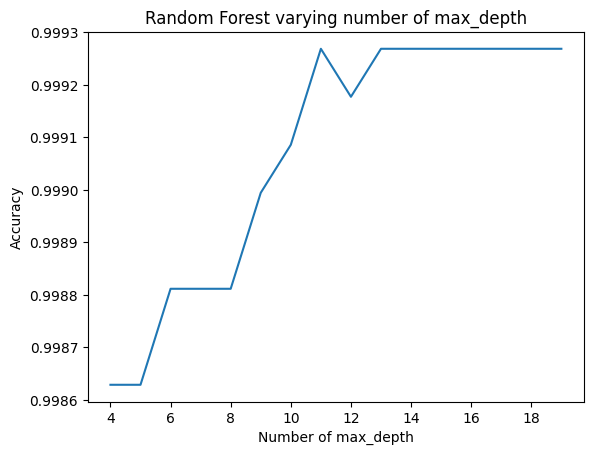

In [ ]:
plt.title('Random Forest varying number of max_depth')
plt.plot(max_depth, test_accuracy)
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_rf_best = RandomForestClassifier(n_estimators = 800, max_depth = 12)

In [ ]:
model_rf_best.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=12, n_estimators=800)

In [ ]:
y_predict2_best = model_rf_best.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_predict2_best)

0.9991770299926848

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_predict3_scaled = knn.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_predict3_scaled)

0.9991770299926848

In [ ]:
# Optimize parameter
neighbors = np.arange(1,100,1)

test_accuracy_3 = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    test_accuracy_3[i] = knn.score(X_test_scaled, y_test)

In [ ]:
test_accuracy_3

array([0.99926847, 0.99917703, 0.99935991, 0.99926847, 0.99917703,
       0.99908559, 0.99917703, 0.99917703, 0.99908559, 0.99926847,
       0.99899415, 0.99899415, 0.99890271, 0.99890271, 0.99881127,
       0.99881127, 0.99881127, 0.99881127, 0.99881127, 0.99881127,
       0.99881127, 0.99881127, 0.99881127, 0.99881127, 0.99881127,
       0.99881127, 0.99881127, 0.99881127, 0.99881127, 0.99881127,
       0.99881127, 0.99881127, 0.99881127, 0.99881127, 0.99881127,
       0.99881127, 0.99871982, 0.99881127, 0.99881127, 0.99881127,
       0.99881127, 0.99881127, 0.99871982, 0.99881127, 0.99871982,
       0.99871982, 0.99862838, 0.99871982, 0.99862838, 0.99881127,
       0.99862838, 0.99871982, 0.99862838, 0.99862838, 0.99862838,
       0.99862838, 0.99862838, 0.99862838, 0.99862838, 0.99862838,
       0.99862838, 0.99862838, 0.99862838, 0.99862838, 0.99862838,
       0.99862838, 0.99862838, 0.99862838, 0.99862838, 0.99862838,
       0.99862838, 0.99862838, 0.99862838, 0.99862838, 0.99862

In [ ]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

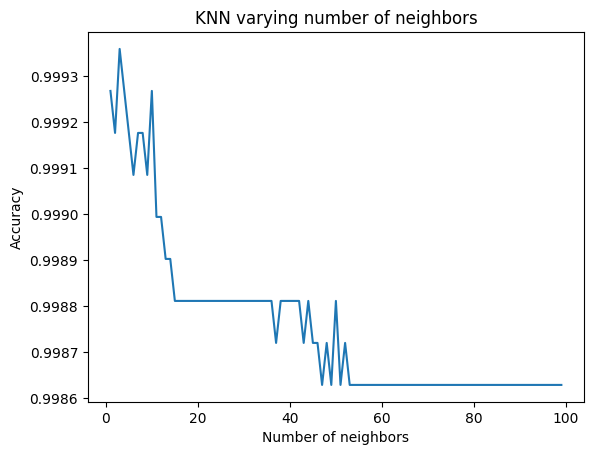

In [ ]:
plt.title('KNN varying number of neighbors')
plt.plot(neighbors, test_accuracy_3)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict3_best = knn_best.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_predict3_best)

0.9992684711046086

**XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier(random_state = 0, eta = 0.05)
model_xgb.fit(X_train_scaled, y_train)
y_predict_xgb = model_xgb.predict(X_test_scaled)
accuracy_score(y_test, y_predict_xgb) * 100

99.96342355523043

In [ ]:
# Optimize parameter
max_depth = np.arange(1,10,1)

test_accuracy_xgb = np.empty(len(max_depth))

for i, k in enumerate(max_depth):
    model_xgb = xgb.XGBClassifier(random_state = 0, max_depth=k)
    model_xgb.fit(X_train_scaled, y_train)
    test_accuracy_xgb[i] = model_xgb.score(X_test_scaled, y_test)

In [ ]:
max_depth

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
test_accuracy_xgb

array([0.99945135, 0.99954279, 0.99963424, 0.99963424, 0.99963424,
       0.99963424, 0.99963424, 0.99963424, 0.99963424])

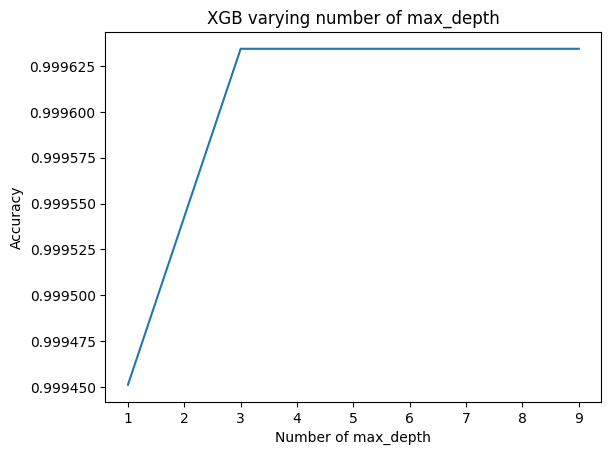

In [ ]:
plt.title('XGB varying number of max_depth')
plt.plot(max_depth,  test_accuracy_xgb)
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_xgb_best = xgb.XGBClassifier(random_state = 0, max_depth=5)
model_xgb_best.fit(X_train_scaled, y_train)
y_predict_xgb_best = model_xgb_best.predict(X_test_scaled)
accuracy_score(y_test, y_predict_xgb_best) * 100

99.96342355523043

**=>> Accuracy score of XGBoost model is the best, so we will use it to predict.**

**Confusion_matrix**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_predict_xgb_best)

array([[   12,     3],
       [    1, 10920]])

In [ ]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict_xgb_best,labels=[0,1]).ravel()
tn,fp,fn,tp

(12, 3, 1, 10920)